In [7]:
import geopandas as gpd
from snow_processing import clip_weekly_to_roi

# 1) Load & reproject your Lombardy ROI geojson
roi = gpd.read_file("F:/GeoinformaticsProject/Data/Lombardy.geojson")
roi = roi.to_crs("EPSG:32632")
shapes = [feature["geometry"] for feature in roi.__geo_interface__["features"]]

# 2) Point to your already‐aligned weekly folders
weekly_dirs = {
  "MODIS": r"F:/GeoinformaticsProject/Data/Processed/WEEKLY/MODIS",
  "GFSC" : r"E:/ALIGNED/ToMODIS/GFSC",
  "S2"   : r"E:/ALIGNED/ToMODIS/S2",
  "S3"   : r"E:/ALIGNED/ToMODIS/S3",
}


# 3) Only clip the common weeks you care about
common_weeks = [
    '2022_W07','2022_W09','2022_W11',
    '2022_W44','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08',
    '2023_W09','2023_W10','2023_W11',
    '2023_W13','2023_W14','2023_W15','2023_W17'
]

# 4) Where to write the clipped rasters
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"

# 5) Run it!
clip_weekly_to_roi(weekly_dirs, shapes, common_weeks, clipped_root)


🏷  Clipped MODIS 2022_W07 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W07.tif
🏷  Clipped MODIS 2022_W09 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W09.tif
🏷  Clipped MODIS 2022_W11 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W11.tif
🏷  Clipped MODIS 2022_W44 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W44.tif
🏷  Clipped MODIS 2022_W49 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W49.tif
🏷  Clipped MODIS 2022_W50 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2022_W50.tif
🏷  Clipped MODIS 2023_W04 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2023_W04.tif
🏷  Clipped MODIS 2023_W06 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2023_W06.tif
🏷  Clipped MODIS 2023_W08 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2023_W08.tif
🏷  Clipped MODIS 2023_W09 → F:/GeoinformaticsProject/Data/Processed/CLIPPED\MODIS\2023_W09.tif
🏷  Clipped MODIS 2023_W10 → F:/GeoinformaticsProje

In [5]:
import rasterio
import numpy as np
paths = {
    "modis" : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/MODIS/2023_W08.tif",
    "s2"    : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/S2/2023_W08.tif",
    "s3"    : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/S3/2023_W08.tif",
    "gfsc"  : r"F:\GeoinformaticsProject\Data\Processed\CLIPPED/GFSC/2023_W08.tif"
}

for name, p in paths.items():
    with rasterio.open(p) as src:
        print(f"{name}:")
        print("  width, height   →", src.width, src.height)
        print("  transform       →", src.transform)
        print("  CRS             →", src.crs)
        print("  nodata value    →", src.nodata)
        vals = src.read(1)
        print("  unique values   →", np.unique(vals)[-5:], "\n")  # show highest few


modis:
  width, height   → 11543 10898
  transform       → | 20.00, 0.00, 460645.15|
| 0.00,-20.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  1 255] 

s2:
  width, height   → 11543 10898
  transform       → | 20.00, 0.00, 460645.15|
| 0.00,-20.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 

s3:
  width, height   → 11543 10898
  transform       → | 20.00, 0.00, 460645.15|
| 0.00,-20.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 

gfsc:
  width, height   → 11543 10898
  transform       → | 20.00, 0.00, 460645.15|
| 0.00,-20.00, 5165386.74|
| 0.00, 0.00, 1.00|
  CRS             → EPSG:32632
  nodata value    → 255.0
  unique values   → [  0   1 255] 



In [2]:
import rasterio, numpy as np


common_weeks = [
    '2022_W07','2022_W09','2022_W11',
    '2022_W44','2022_W49','2022_W50',
    '2023_W04','2023_W06','2023_W08',
    '2023_W09','2023_W10','2023_W11',
    '2023_W13','2023_W14','2023_W15','2023_W17'
]

for prod in ["MODIS","GFSC","S2","S3"]:
    # pick the first week just to spot-check
    week = common_weeks[0]
    p = f"F:/GeoinformaticsProject/Data/Processed/CLIPPED/{prod}/{week}.tif"
    with rasterio.open(p) as src:
        print(prod, "→", np.unique(src.read(1)))

MODIS → [  1 255]
GFSC → [  0   1 255]
S2 → [  0   1 255]
S3 → [  0   1 255]


In [23]:
import rasterio
import numpy as np

# adjust these paths to one 2022_W07 tile at each stage:
paths = {
    "1. raw GFSC ":  r"F:\GeoinformaticsProject\Data\GFSC\GFSC\20211107\20211107_GF.tif",
    "2. resampled → EPSG:32632":     r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\GFSC\20211107_GF.tif",
    "3. weekly aggregate (2021_W44)":r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\GFSC\2021_W44.tif",
    "4. Aligned (2022_W44)":         r"E:\ALIGNED\ToMODIS\GFSC\2022_W44.tif",
    "5. clipped (2022_W09)":         r"F:\GeoinformaticsProject\Data\Processed\CLIPPED\GFSC\2022_W09.tif",
}

for stage, p in paths.items():
    try:
        with rasterio.open(p) as src:
            vals = np.unique(src.read(1))
        print(f"{stage:30s} → {vals}")
    except Exception as e:
        print(f"{stage:30s} → ERROR: {e}")


1. raw GFSC                    → [  0   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 205 255]
2. resampled → EPSG:32632      → [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132

In [18]:
import rasterio
import numpy as np

# adjust these paths to one 2022_W07 tile at each stage:
paths = {
    "1. raw MODIS (original L1C)":  r"F:\GeoinformaticsProject\Data\MODIS_SnowMask\2022\neve_20220513.img",
    "2. resampled → EPSG:32632":     r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\MODIS\RR-neve_20211220.tif",
    "3. weekly aggregate (2022_W07)":r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\MODIS/2022_W44.tif",
    "4. clipped (2022_W07)":         r"F:/GeoinformaticsProject/Data/Processed/CLIPPED/MODIS/2022_W44.tif",
}

for stage, p in paths.items():
    try:
        with rasterio.open(p) as src:
            vals = np.unique(src.read(1))
        print(f"{stage:30s} → {vals}")
    except Exception as e:
        print(f"{stage:30s} → ERROR: {e}")


1. raw MODIS (original L1C)    → [1 2]
2. resampled → EPSG:32632      → [0 1 2]
3. weekly aggregate (2022_W07) → [0 1]
4. clipped (2022_W07)          → [  1 255]


In [22]:
import rasterio
import numpy as np

# adjust these paths to one 2022_W07 tile at each stage:
paths = {
    "1. raw S2 ":  r"F:\GeoinformaticsProject\Data\S2\S2\SnowMask\20220103_20220116_SnowMask_latest.tif",
    "2. resampled → EPSG:32632":     r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S2\RR-20220103_20220116_SnowMask_latest_W1.tif",
    "3. weekly aggregate (2022_W44)":r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\S2\2022_W44.tif",
    "4. Aligned (2022_W44)":         r"E:\ALIGNED\ToMODIS\S2\2022_W44.tif",
    "5. clipped (2022_W07)":         r"F:\GeoinformaticsProject\Data\Processed\CLIPPED\S2\2022_W07.tif",
}

for stage, p in paths.items():
    try:
        with rasterio.open(p) as src:
            vals = np.unique(src.read(1))
        print(f"{stage:30s} → {vals}")
    except Exception as e:
        print(f"{stage:30s} → ERROR: {e}")


1. raw S2                      → [0 1]
2. resampled → EPSG:32632      → [0 1]
3. weekly aggregate (2022_W44) → [ 1. nan]
4. Aligned (2022_W44)          → [0 1]
5. clipped (2022_W07)          → [  0   1 255]


In [25]:
import rasterio
import numpy as np

# adjust these paths to one 2022_W07 tile at each stage:
paths = {
    "1. raw S3 ":  r"F:\GeoinformaticsProject\Data\S3\S3\SnowMask\20220103_20220109_SnowMask(0.42)_latest.tif",
    "2. resampled → EPSG:32632":     r"F:\GeoinformaticsProject\Data\Processed\RESAMPLED-REPROJECTED\S3\RR-20220103_20220109_SnowMask(0.42)_latest.tif",
    "3. weekly aggregate (2022_W44)":r"F:\GeoinformaticsProject\Data\Processed\WEEKLY\S3\2022_W44.tif",
    "4. Aligned (2022_W44)":         r"E:\ALIGNED\ToMODIS\S2\2022_W44.tif",
    "5. clipped (2022_W07)":         r"F:\GeoinformaticsProject\Data\Processed\CLIPPED\S3\2022_W07.tif",
}

for stage, p in paths.items():
    try:
        with rasterio.open(p) as src:
            vals = np.unique(src.read(1))
        print(f"{stage:30s} → {vals}")
    except Exception as e:
        print(f"{stage:30s} → ERROR: {e}")


1. raw S3                      → [0 1]
2. resampled → EPSG:32632      → [0 1]
3. weekly aggregate (2022_W44) → [ 1. nan]
4. Aligned (2022_W44)          → [0 1]
5. clipped (2022_W07)          → [  0   1 255]


In [7]:
import rasterio
import numpy as np

path = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED/MODIS/2022_W44.tif"
with rasterio.open(path) as src:
    arr = src.read(1)

# count how many 0, 1, and nodata (255) pixels
uniq, counts = np.unique(arr, return_counts=True)
for v, c in zip(uniq, counts):
    label = {0: "zero (no-snow)",
             1: "one  (snow)",
           255: "nodata/outside ROI"}.get(v, v)
    print(f"{label:15s} → {c:,} pixels")


one  (snow)     → 59,653,061 pixels
nodata/outside ROI → 66,142,553 pixels


In [9]:
from snow_processing import compute_weekly_statistics


# 1) Define where your clipped files live and which products to include
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products     = ["MODIS", "GFSC", "S2", "S3"]

# 2) Run the stats function
df_stats = compute_weekly_statistics(clipped_root, products, pixel_size=20.0)

# 3) Inspect the first few rows
print(df_stats.head())


  product      week  total_pixels  snow_pixels  missing_pixels  snow_area_km2  \
0    GFSC  2022_W07      59653061      4649496        66142553      1859.7984   
1   MODIS  2022_W07      59653061     59653061        66142553     23861.2244   
2      S2  2022_W07      59653061      8667788        66142553      3467.1152   
3      S3  2022_W07      59653061     12428916        66142553      4971.5664   
4    GFSC  2022_W09      59653061      2273490        66142553       909.3960   

   coverage_pct  
0      7.794229  
1    100.000000  
2     14.530332  
3     20.835337  
4      3.811187  


In [11]:
from snow_processing import compute_pairwise_agreement

# 1) Point at your **clipped** folders, not the aligned ones:
clipped_root  = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products      = ["MODIS", "GFSC", "S2", "S3"]
common_weeks  = [
    '2022_W07', '2022_W09', '2022_W11',
    '2022_W44', '2022_W49', '2022_W50',
    '2023_W04', '2023_W06', '2023_W08',
    '2023_W09', '2023_W10', '2023_W11',
    '2023_W13', '2023_W14', '2023_W15', '2023_W17'
]

# 2) Run agreement on clipped Lombardy‐only files
df_agree = compute_pairwise_agreement(clipped_root, products, common_weeks)

# 3) Verify it’s non‐empty and has the “week” column
print(df_agree.shape)
print(df_agree.columns)
print(df_agree.head())


(96, 11)
Index(['week', 'prod1', 'prod2', 'agreement_pct', 'total_pixels',
       'agree_pixels', 'p1_only_pixels', 'p2_only_pixels', 'p1_only_area_km2',
       'p2_only_area_km2', 'area_bias_km2'],
      dtype='object')
       week  prod1 prod2  agreement_pct  total_pixels  agree_pixels  \
0  2022_W07   GFSC    S2      88.637562      59653061      52875019   
1  2022_W07   GFSC    S3      79.640401      59653061      47507937   
2  2022_W07  MODIS  GFSC       7.794229      59653061       4649496   
3  2022_W07  MODIS    S2      14.530332      59653061       8667788   
4  2022_W07  MODIS    S3      20.835337      59653061      12428916   

   p1_only_pixels  p2_only_pixels  p1_only_area_km2  p2_only_area_km2  \
0         1379875         5398167          551.9500         2159.2668   
1         2182852         9962272          873.1408         3984.9088   
2        55003565               0        22001.4260            0.0000   
3        50985273               0        20394.1092         

In [14]:
# Quick check on S2 vs S3
print(df_agree.query("prod1=='S2' and prod2=='S3'")[["week","agreement_pct"]])

        week  agreement_pct
5   2022_W07      85.666275
11  2022_W09      94.514188
17  2022_W11      96.005865
23  2022_W44      91.571624
29  2022_W49      83.387704
35  2022_W50      79.195059
41  2023_W04      89.232128
47  2023_W06      91.004539
53  2023_W08      95.901768
59  2023_W09      93.532052
65  2023_W10      89.152632
71  2023_W11      91.931306
77  2023_W13      94.329682
83  2023_W14      94.829942
89  2023_W15      90.125635
95  2023_W17      93.521870


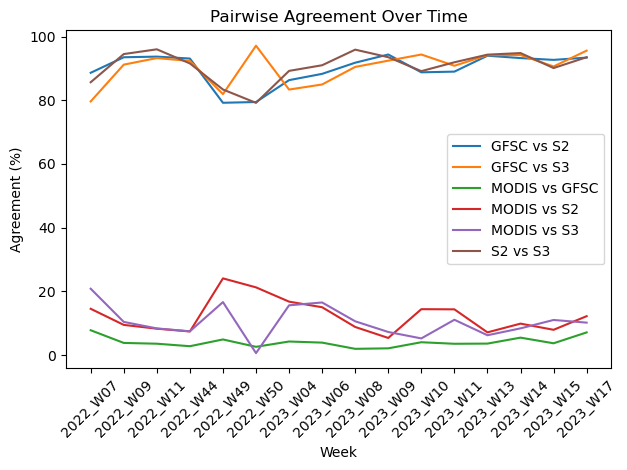

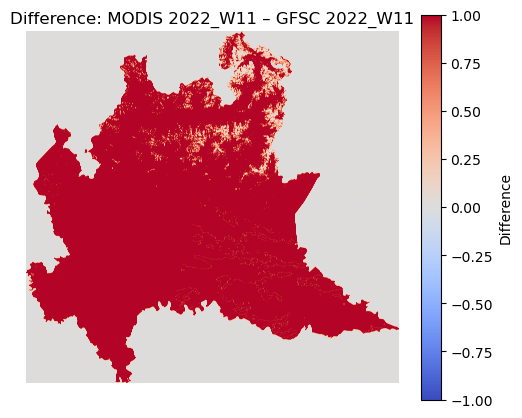

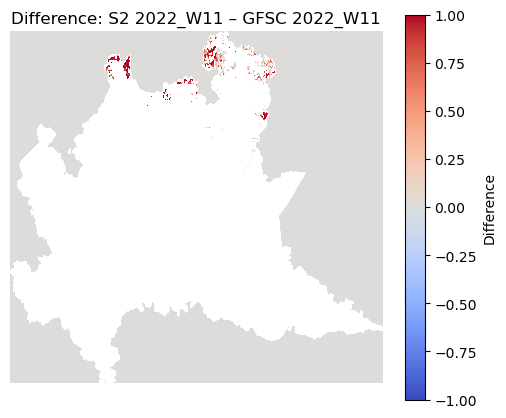

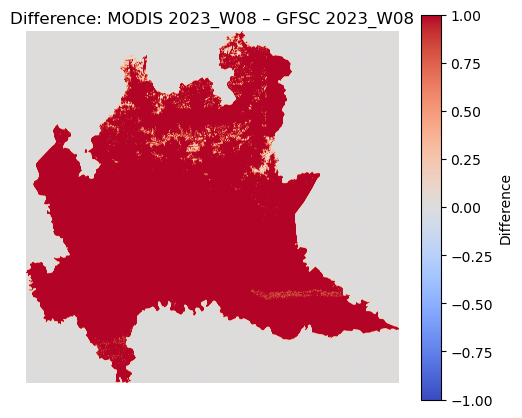

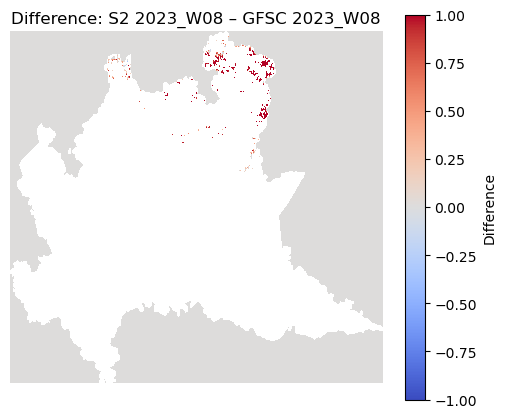

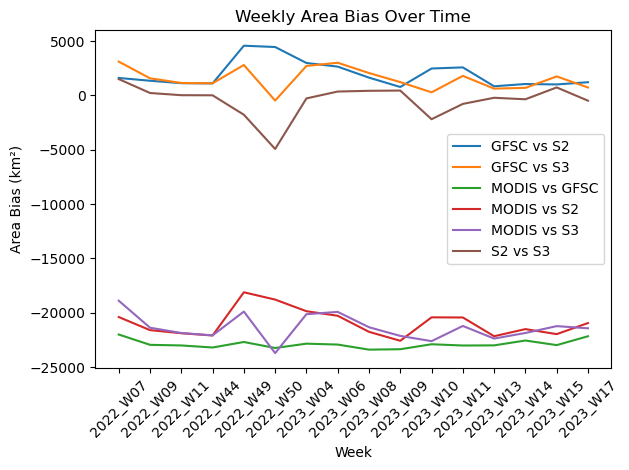

In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from snow_processing import compute_pairwise_agreement

# 1) Paths and settings
clipped_root = r"F:/GeoinformaticsProject/Data/Processed/CLIPPED"
products     = ["MODIS", "GFSC", "S2", "S3"]
common_weeks = [
    '2022_W07', '2022_W09', '2022_W11',
    '2022_W44', '2022_W49', '2022_W50',
    '2023_W04', '2023_W06', '2023_W08',
    '2023_W09', '2023_W10', '2023_W11',
    '2023_W13', '2023_W14', '2023_W15', '2023_W17'
]

# 2) Compute pairwise agreement DataFrame
df_agree = compute_pairwise_agreement(clipped_root, products, common_weeks)

# 3) Time series of agreement_pct for all product pairs
df_ts = df_agree.pivot(index="week", columns=["prod1","prod2"], values="agreement_pct")
df_ts = df_ts.reindex(common_weeks)

plt.figure()
for pair in df_ts.columns:
    plt.plot(df_ts.index, df_ts[pair], label=f"{pair[0]} vs {pair[1]}")
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("Agreement (%)")
plt.title("Pairwise Agreement Over Time")
plt.legend()
plt.tight_layout()
plt.show()


# 4) Spatial difference maps for representative weeks
from snow_processing import visual_compare_rasters_strict

representative_weeks = ['2022_W11', '2023_W08']
pairs_to_map = [('MODIS','GFSC'), ('S2','GFSC')]

for week in representative_weeks:
    for p1, p2 in pairs_to_map:
        path1 = os.path.join(clipped_root, p1, f"{week}.tif")
        path2 = os.path.join(clipped_root, p2, f"{week}.tif")
        visual_compare_rasters_strict(
            raster_path1=path1,
            raster_path2=path2,
            labels=(f"{p1} {week}", f"{p2} {week}"),
            difference=True,
            downsample=1
        )


# 5) Time series of area bias (km²) for all product pairs
df_bias = df_agree.pivot(index="week", columns=["prod1","prod2"], values="area_bias_km2")
df_bias = df_bias.reindex(common_weeks)

plt.figure()
for pair in df_bias.columns:
    plt.plot(df_bias.index, df_bias[pair], label=f"{pair[0]} vs {pair[1]}")
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("Area Bias (km²)")
plt.title("Weekly Area Bias Over Time")
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# show the raw numbers, not the plotted line
print(
    df_agree
      .query("prod1 == 'S2' and prod2 == 'S3'")
      .loc[:, ["week","agreement_pct","p1_only_pixels","p2_only_pixels"]]
)


        week  agreement_pct  p1_only_pixels  p2_only_pixels
5   2022_W07      85.666275         2394689         6155817
11  2022_W09      94.514188         1356562         1915893
17  2022_W11      96.005865         1164885         1217739
23  2022_W44      91.571624         2500186         2527598
29  2022_W49      83.387704         7175674         2734069
35  2022_W50      79.195059        12364329           46455
41  2023_W04      89.232128         3554515         2868850
47  2023_W06      91.004539         2236528         3129540
53  2023_W08      95.901768          691253         1753468
59  2023_W09      93.532052         1370209         2488120
65  2023_W10      89.152632         5973677          497110
71  2023_W11      91.931306         3382335         1430888
77  2023_W13      94.329682         1960342         1422176
83  2023_W14      94.829942         1985920         1098178
89  2023_W15      90.125635         2025226         3865135
95  2023_W17      93.521870         2537